In [ ]:
%matplotlib inline


# Above-average features in Boston


Explore above-average neighborhood characteristics in the Boston dataset.

Here we take some features correlated with house price, and look at the
distribution of median house price when each of these features is above
average.

The most correlated features are:

ZN
    proportion of residential land zoned for lots over 25,000 sq.ft.
CHAS
    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
RM
    average number of rooms per dwelling
DIS
    weighted distances to five Boston employment centres
B
    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

This kind of dataset analysis may not be a practical use of UpSet, but helps
to illustrate the :meth:`UpSet.add_catplot` feature.



In [4]:
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from upsetplot import UpSet
import pandas as pd
import numpy as np


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# Load the dataset into a DataFrame
# boston = load_boston()
boston = target
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Get five features most correlated with median house value
correls = boston_df.corrwith(pd.Series(boston.target),
                             method='spearman').sort_values()
top_features = correls.index[-5:]

# Get a binary indicator of whether each top feature is above average
boston_above_avg = boston_df > boston_df.median(axis=0)
boston_above_avg = boston_above_avg[top_features]
boston_above_avg = boston_above_avg.rename(columns=lambda x: x + '>')

# Make this indicator mask an index of boston_df
boston_df = pd.concat([boston_df, boston_above_avg],
                      axis=1)
boston_df = boston_df.set_index(list(boston_above_avg.columns))

# Also give us access to the target (median house value)
boston_df = boston_df.assign(median_value=boston.target)

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

ModuleNotFoundError: No module named 'seaborn'

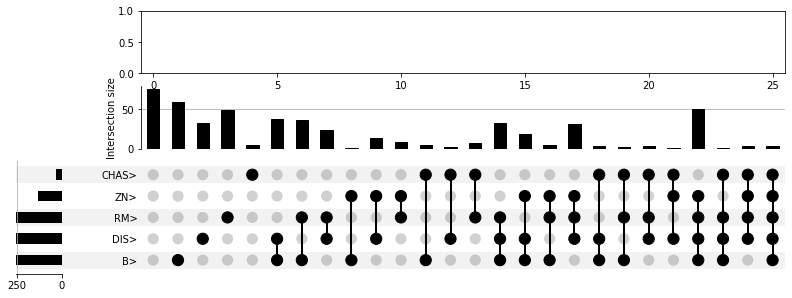

In [3]:
# UpSet plot it!
upset = UpSet(boston_df, subset_size='count', intersection_plot_elements=3)
upset.add_catplot(value='median_value', kind='strip', color='blue')
upset.add_catplot(value='AGE', kind='strip', color='black')
upset.plot()
plt.title("UpSet with catplots, for orientation='horizontal'")
plt.show()

In [ ]:
# And again in vertical orientation

upset = UpSet(boston_df, subset_size='count', intersection_plot_elements=3,
              orientation='vertical')
upset.add_catplot(value='median_value', kind='strip', color='blue')
upset.add_catplot(value='AGE', kind='strip', color='black')
upset.plot()
plt.title("UpSet with catplots, for orientation='vertical'")
plt.show()